In [1]:
cd ..

/Users/estevao.uyra/dev/personal/criticality-on-neural-network


In [2]:
import sys
sys.path.append("./src")


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
plt.rcParams['figure.dpi'] = 200

In [3]:
import connectivity as conn
from itertools import product
from tqdm.notebook import tqdm
import pickle
from analysis import avalanche_basic_stats

In [4]:
proportion_inhib_vals = [.1, .2, .3]
synaptic_efficacies = np.linspace(.1,.8, 5).round(2)
repetitions = range(3)
omegas = np.logspace(-1, 1.2, 5).round(2)
topologies = {
    'full': lambda prop: conn.fully_connected_network(500, proportion_inhib=prop),
    'small_world': lambda prop: conn.small_world_network(500, 4, .1, proportion_inhib=prop),
    'scale_free': lambda prop: conn.neuron_scale_free_network(500, 100, proportion_inhib=prop)
}


parameter_combinations = list(product(repetitions, proportion_inhib_vals,
                                      synaptic_efficacies, omegas, topologies.items()))

all_stats = []
for (i, proportion_inhib,
     eff, omega, (topol_name, topol_f)) in tqdm(parameter_combinations):  # ex. range(3, 30)

    filepath = f'data/s{i}_W{topol_name}_omg{omega}_p{proportion_inhib}_eff{eff}.pkl'
    m = np.array(pickle.load(open(filepath,'rb')).todense())
    tot, sizes, dur = avalanche_basic_stats(m[:,1000:])
    
    stats = pd.DataFrame(
        dict(
            i = i,
            p_inh = proportion_inhib,
            eff=eff,
            omega=omega,
            topol = topol_name,
            total_avalanches = tot,
            avalanche_sizes = [sizes],
            avalanche_durations = [dur],
            total_spikes = m.sum(),
            filename = filepath
        ))
    
    all_stats.append(stats)
    
all_stats = pd.concat(all_stats)

In [6]:
all_stats.to_csv("parameter_search_simulation_stats.csv")

In [7]:
all_stats['avg_duration'] = all_stats.avalanche_durations.apply(np.mean).fillna(0)
all_stats['avg_size'] = all_stats.avalanche_sizes.apply(np.mean).fillna(0)

/usr/local/anaconda3/envs/criticality-on-neural-network/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


## Number of avalanches

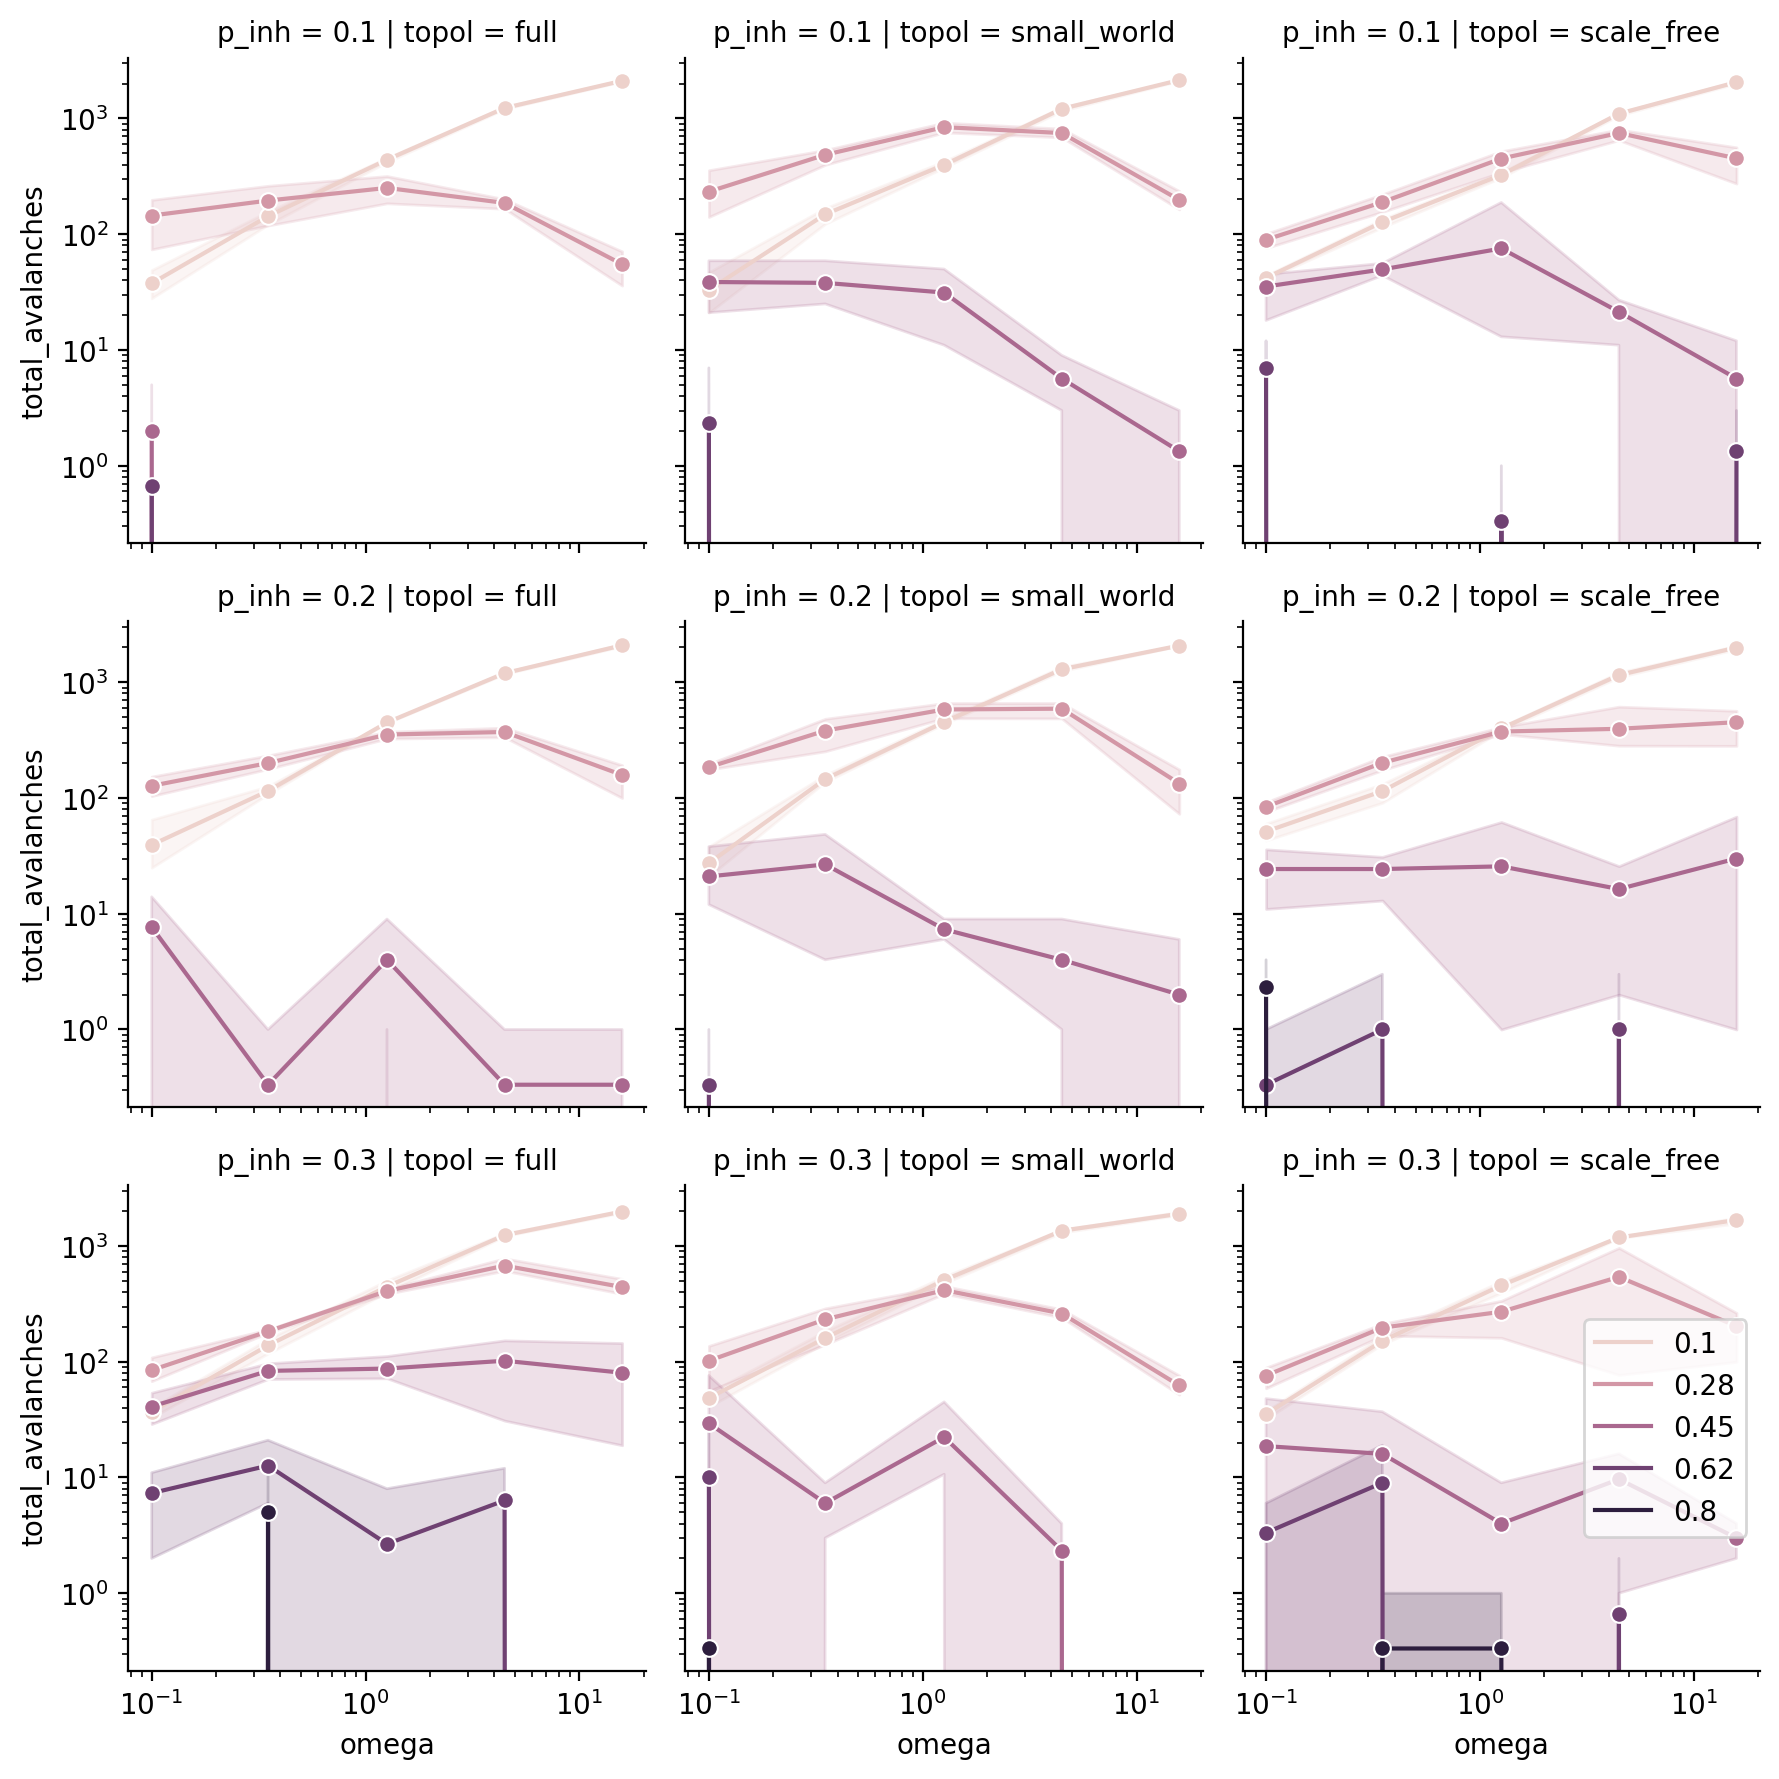

In [8]:
g = sns.FacetGrid(all_stats, col='topol', row='p_inh')
g.map(sns.lineplot, 'omega', 'total_avalanches', 'eff', marker='o')
g.set(yscale='log', xscale='log')
plt.tight_layout()
plt.legend()

## Total number of spikes 

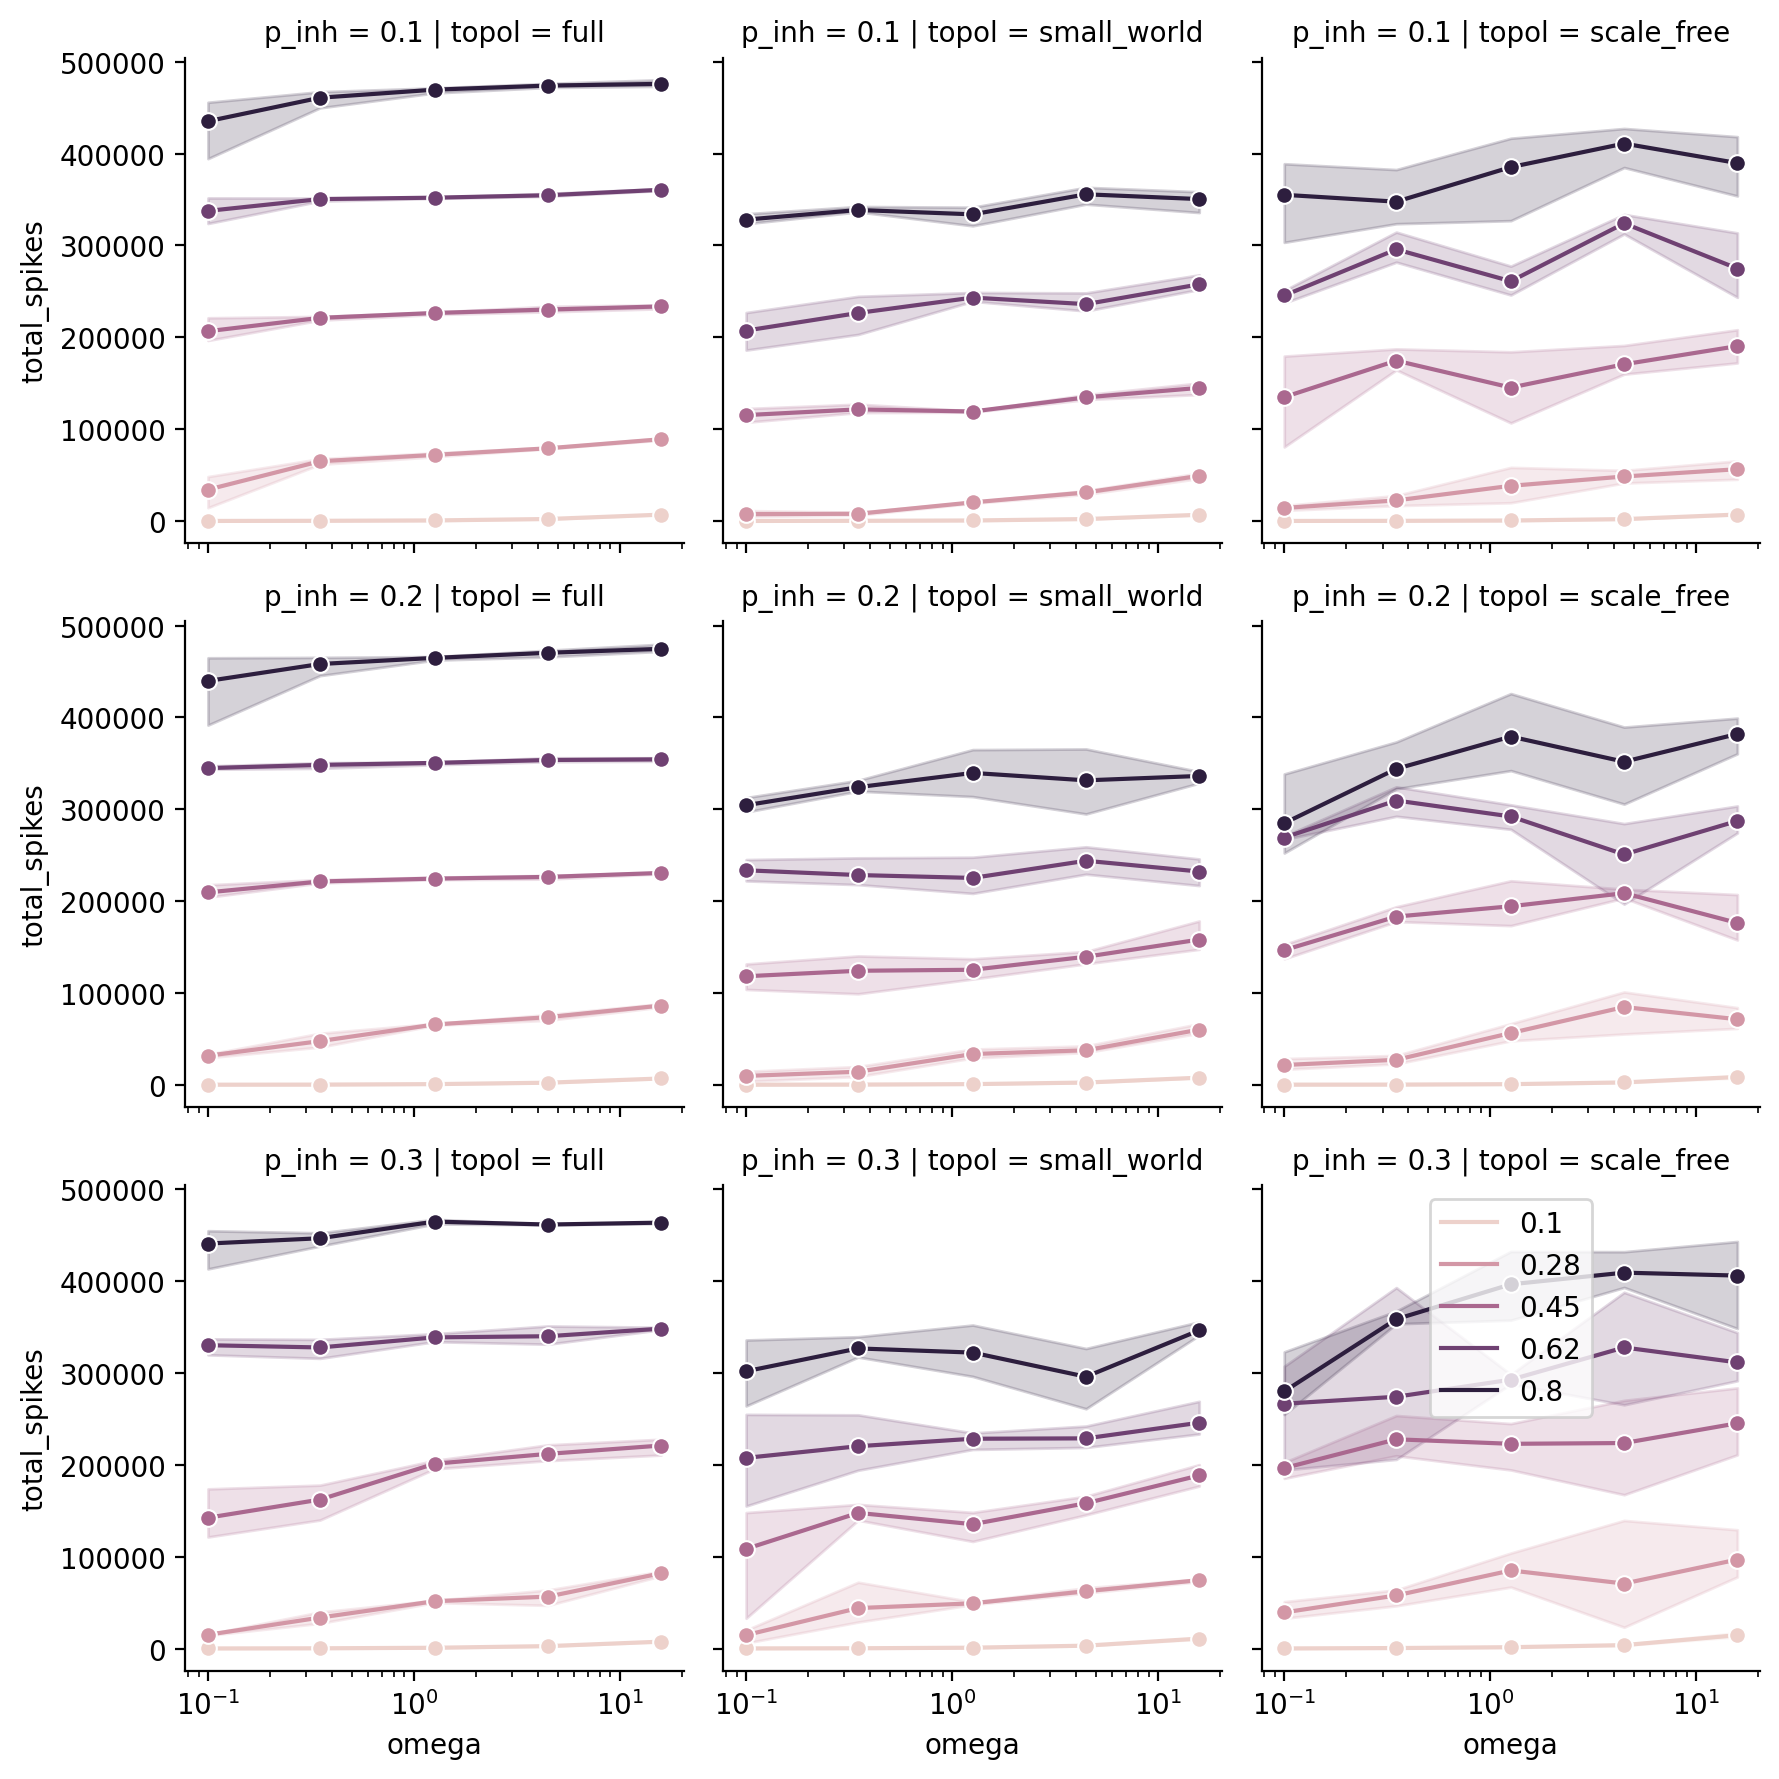

In [11]:
g = sns.FacetGrid(all_stats, col='topol', row='p_inh')
g.map(sns.lineplot, 'omega', 'total_spikes', 'eff', marker='o')
g.set(xscale='log')
plt.tight_layout()
plt.legend()

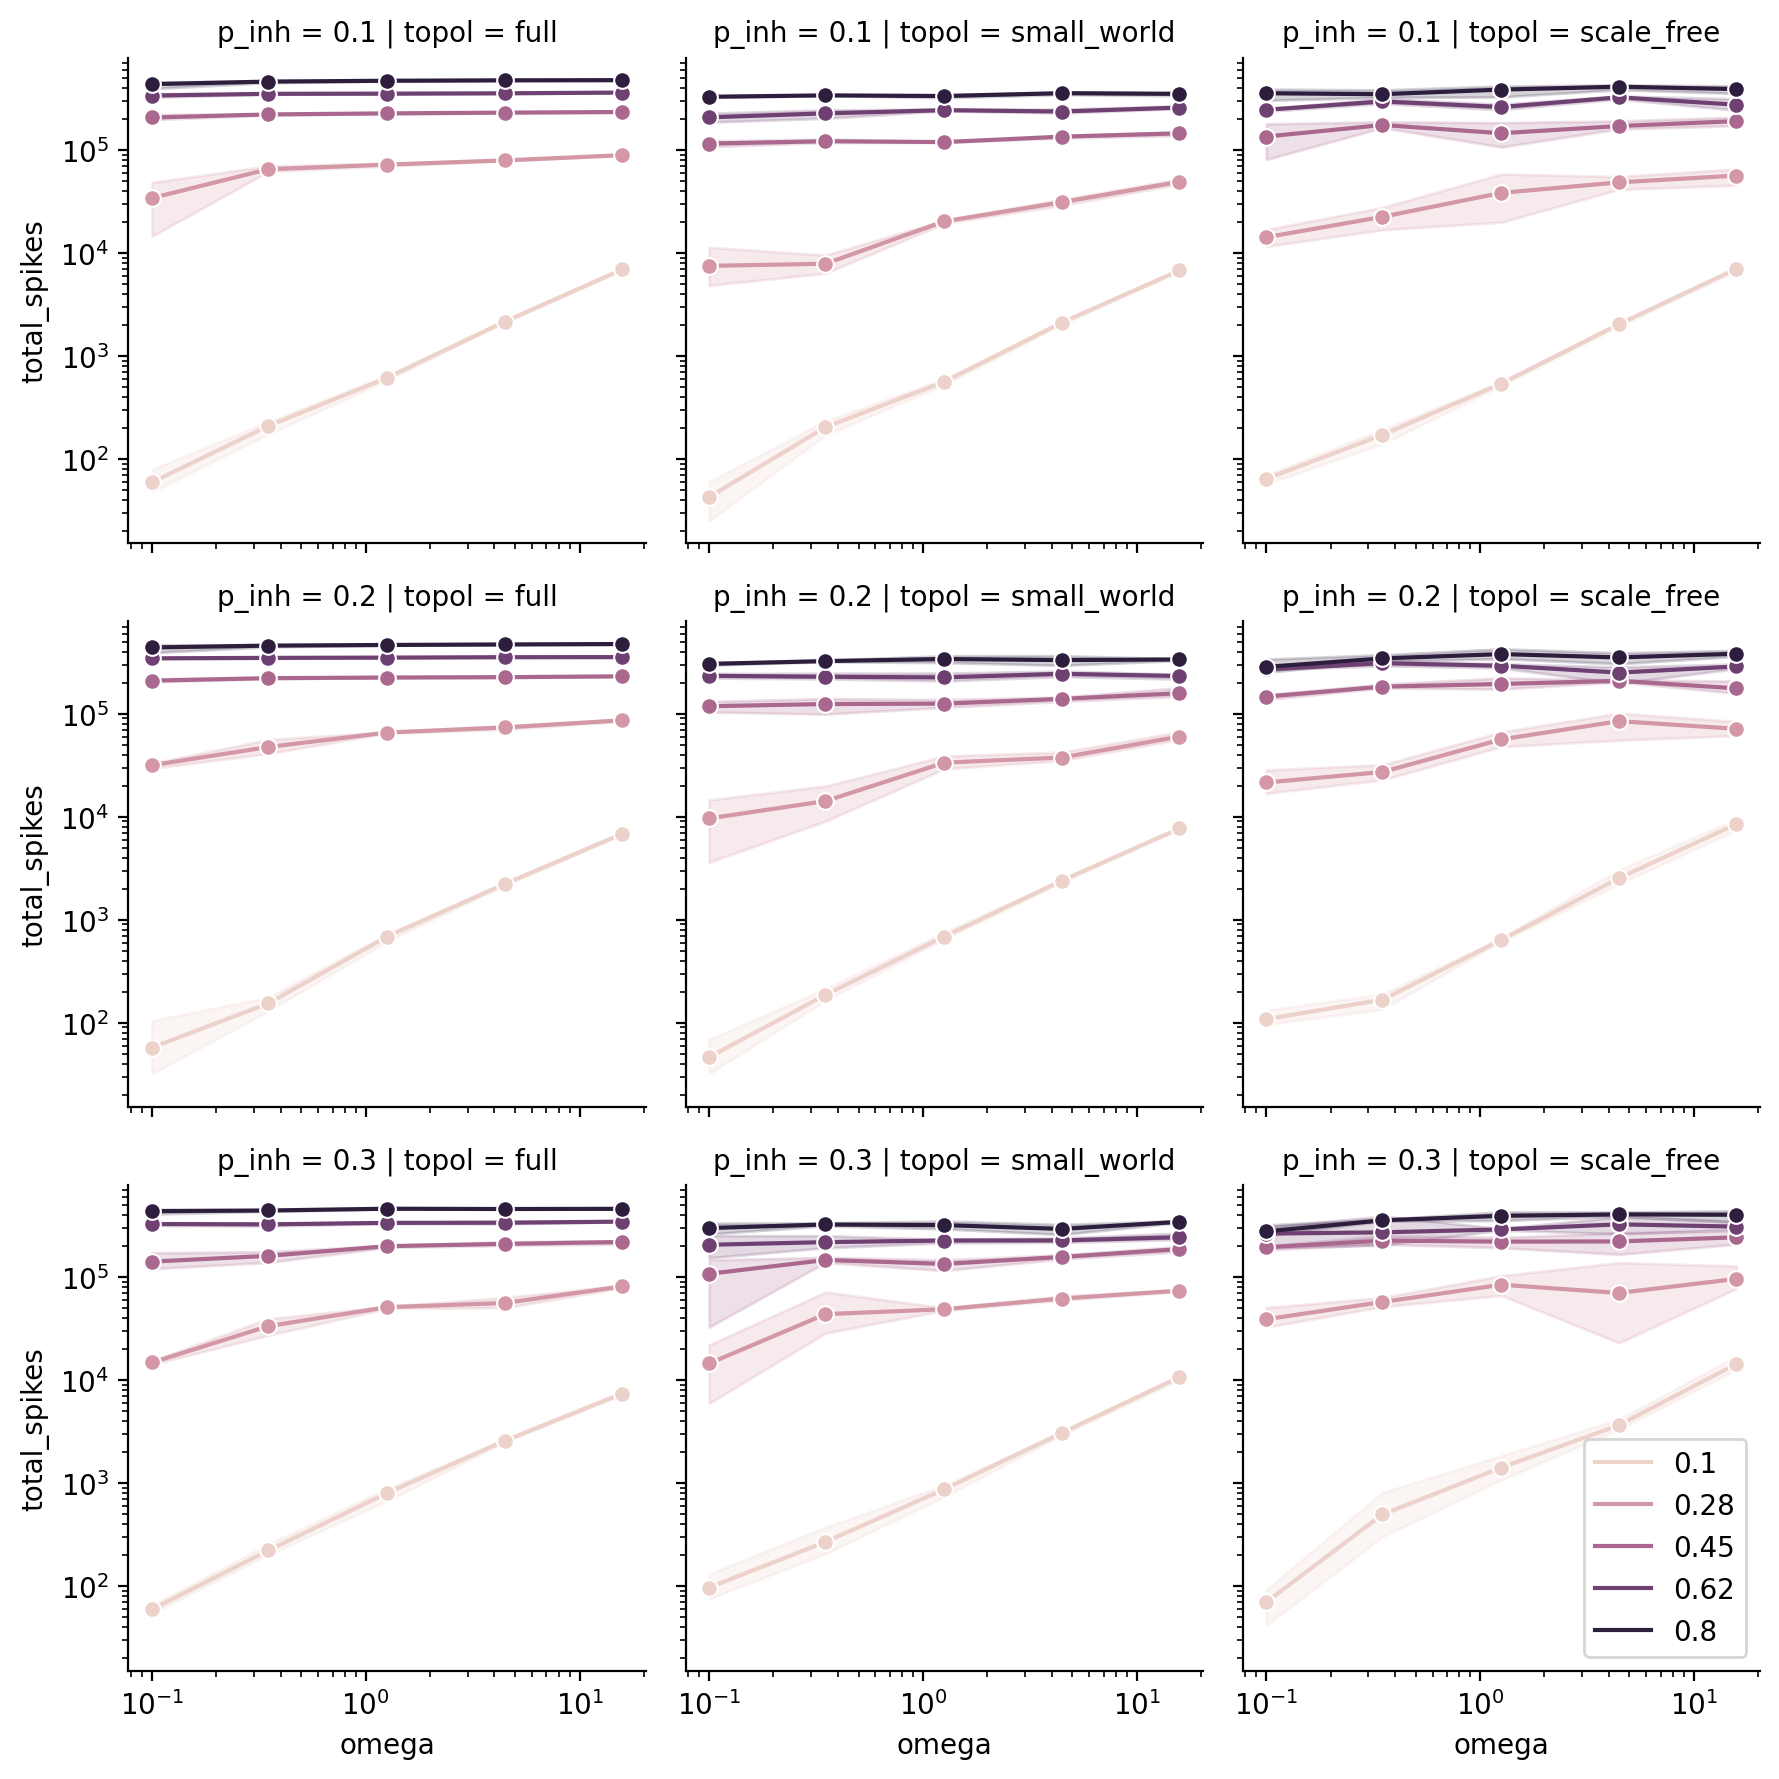

In [12]:
g = sns.FacetGrid(all_stats, col='topol', row='p_inh')
g.map(sns.lineplot, 'omega', 'total_spikes', 'eff', marker='o')
g.set(yscale='log', xscale='log')
plt.tight_layout()
plt.legend()

## Average avalanche size

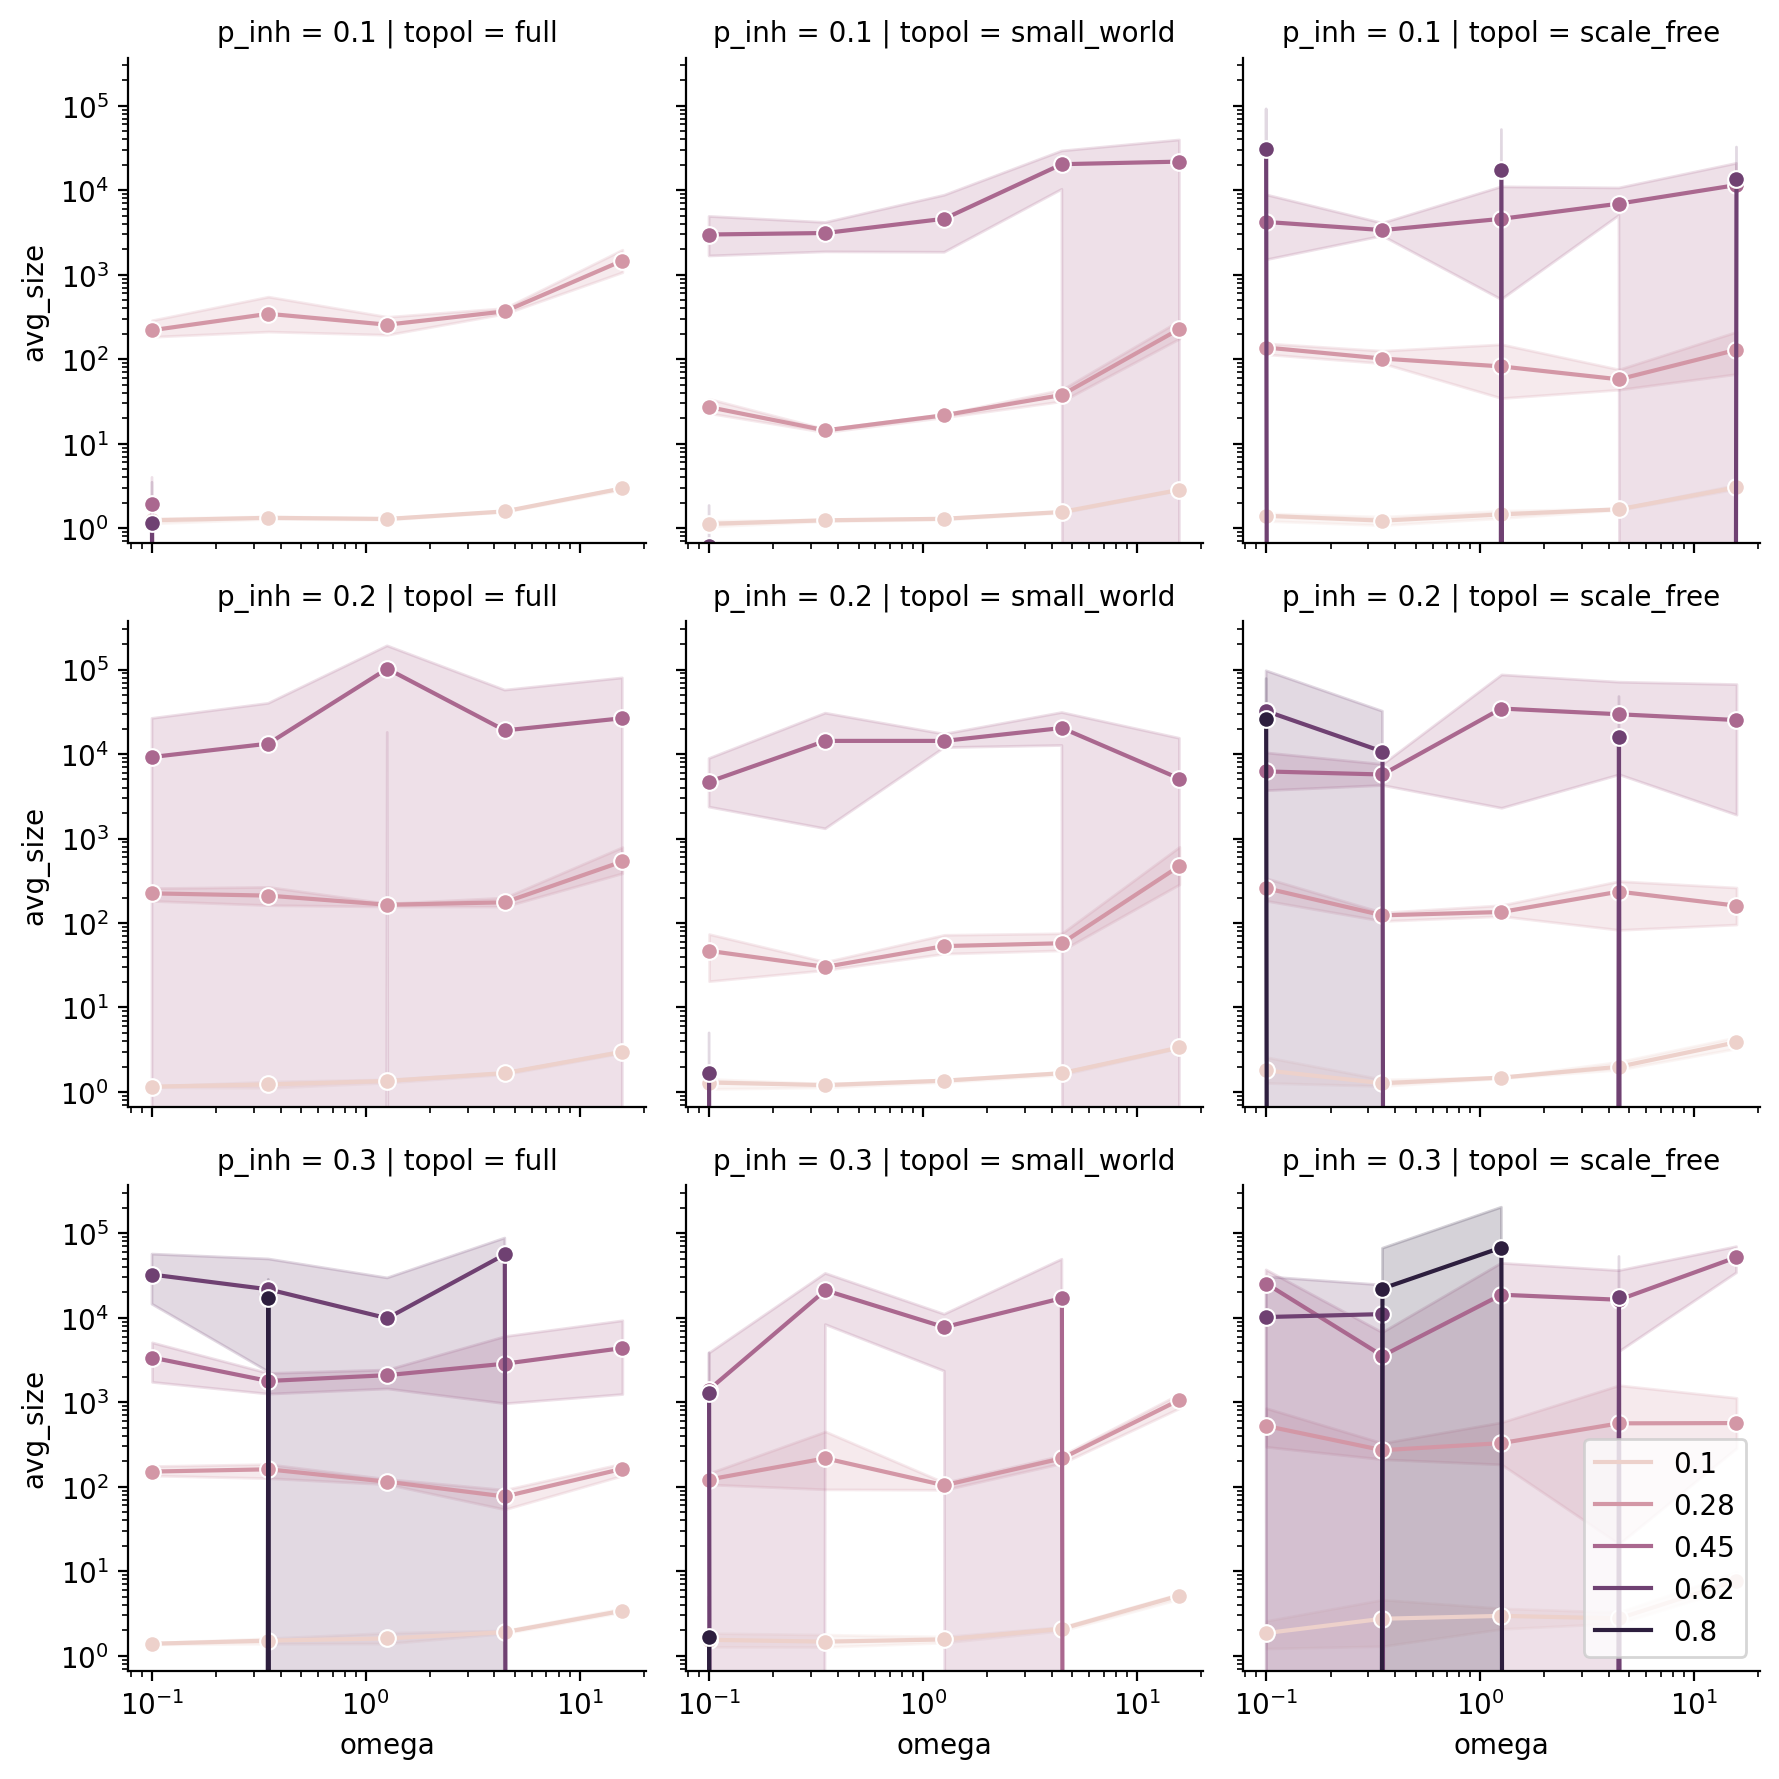

In [14]:
g = sns.FacetGrid(all_stats, col='topol', row='p_inh')
g.map(sns.lineplot, 'omega', 'avg_size', 'eff', marker='o')
g.set(yscale='log', xscale='log')
plt.tight_layout()
plt.legend()

## Average avalanche duration

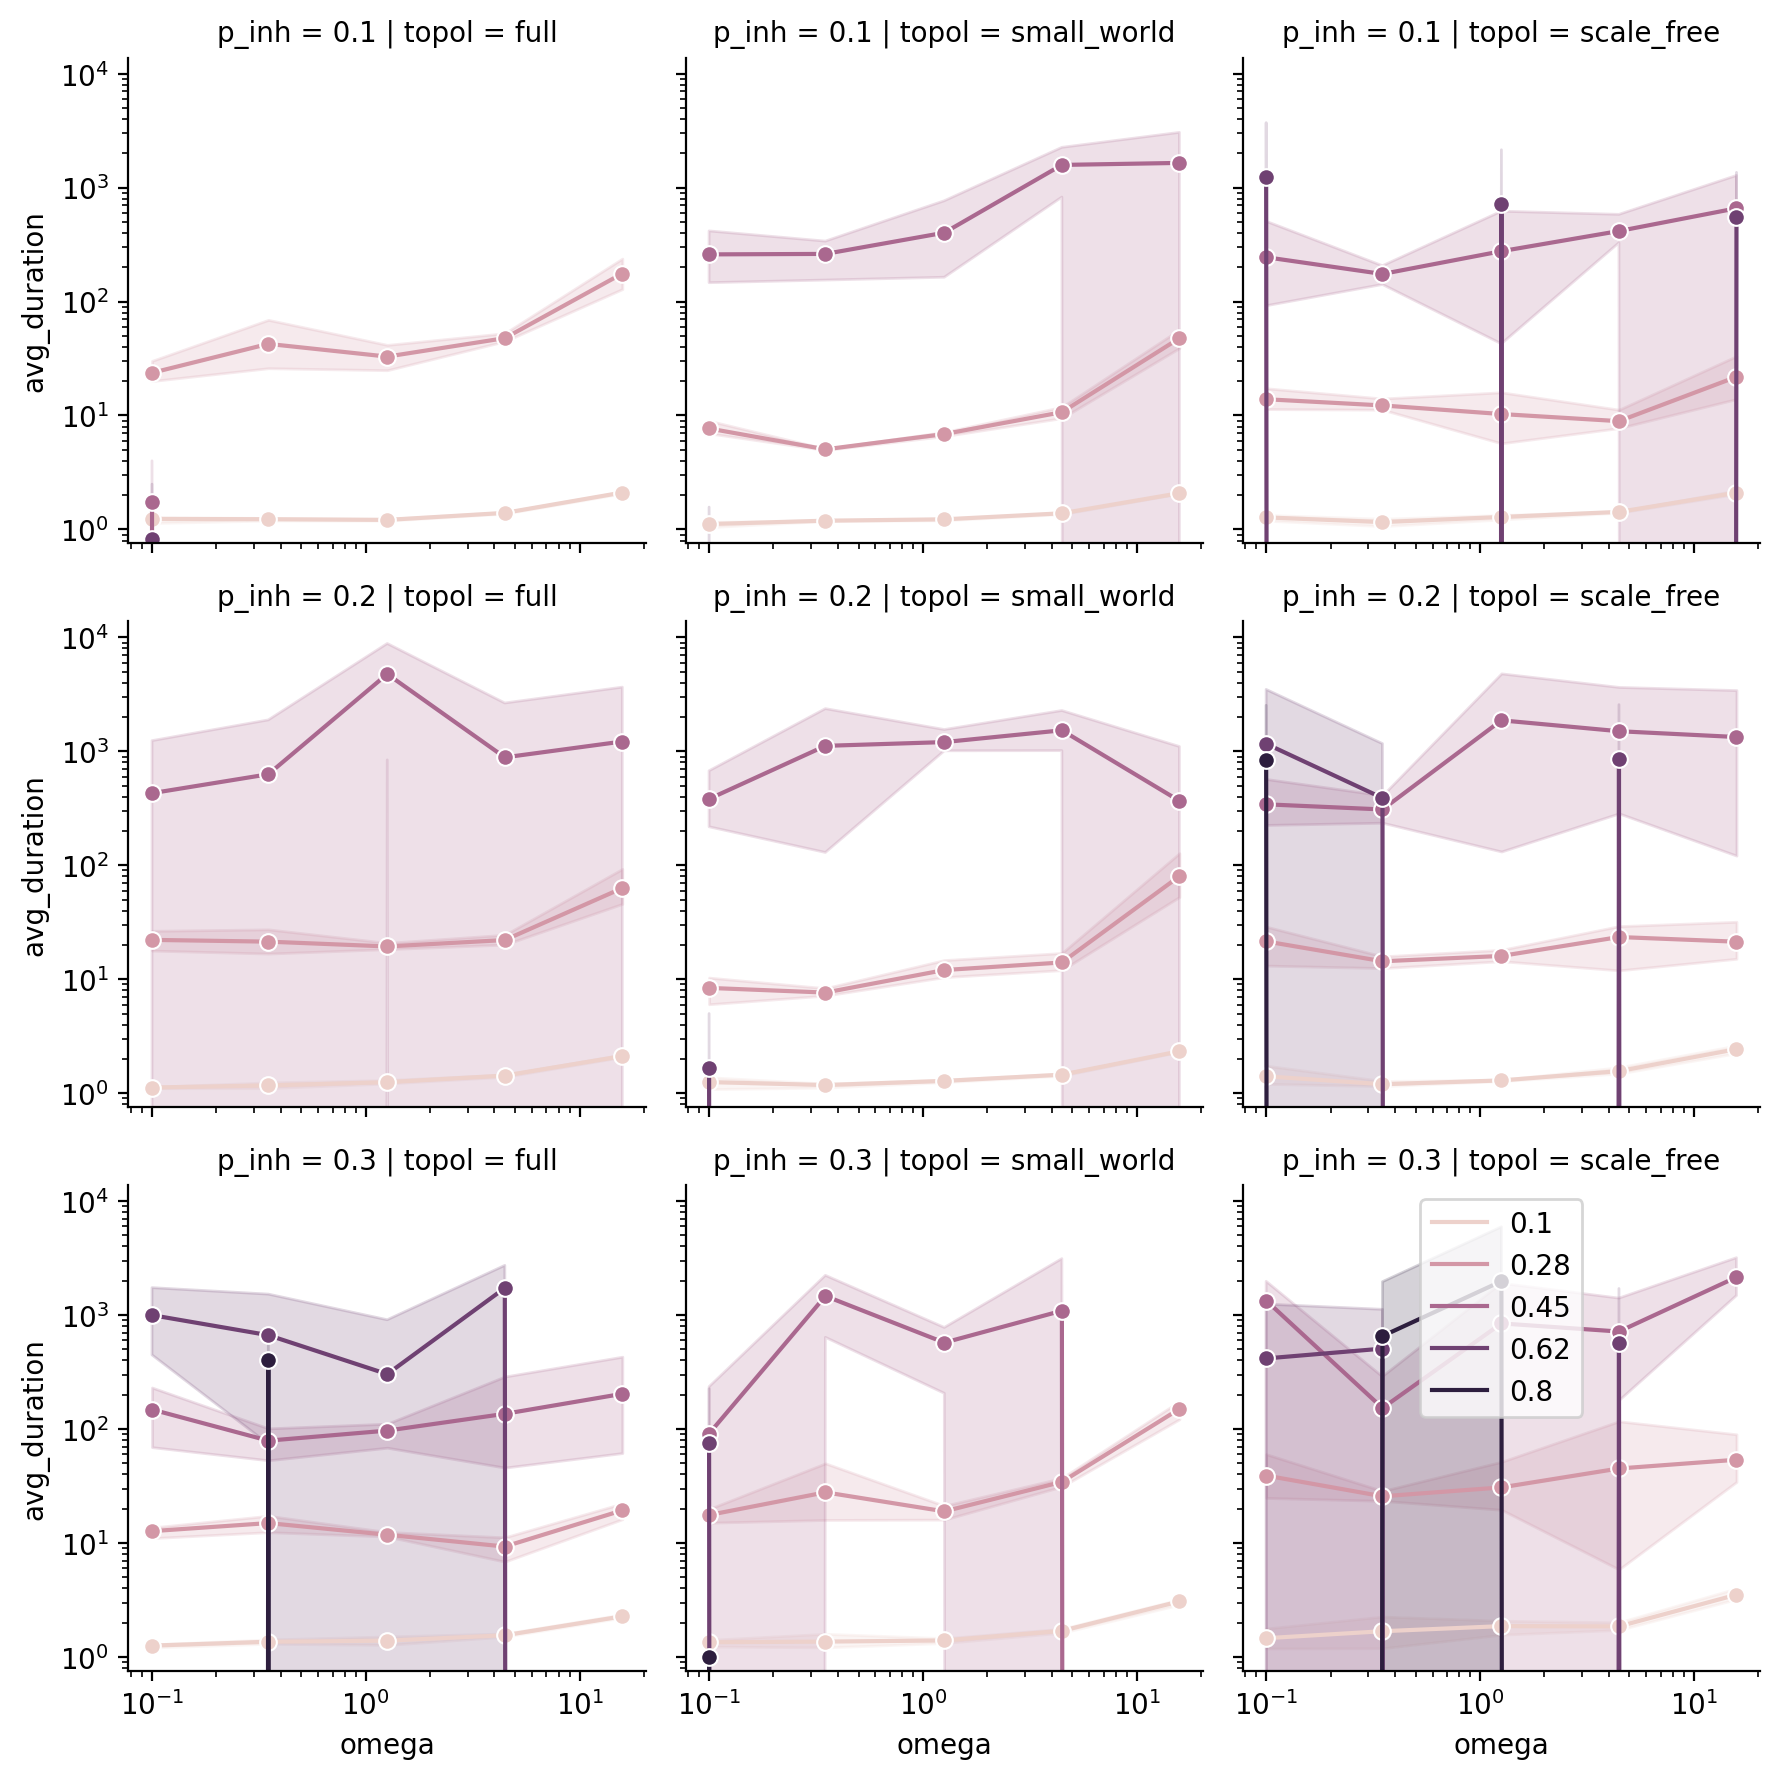

In [15]:
g = sns.FacetGrid(all_stats, col='topol', row='p_inh')
g.map(sns.lineplot, 'omega', 'avg_duration', 'eff', marker='o')
g.set(yscale='log', xscale='log')
plt.tight_layout()
plt.legend()

# Deeper into the best

In [29]:
from visuals import loglogdensity

In [33]:
best

,i,p_inh,eff,omega,topol,total_avalanches,avalanche_sizes,avalanche_durations,total_spikes,filename,avg_duration,avg_size
0,0,0.3,0.28,4.47,full,637,"[2560, 17, 6, 8, 17, 2, 13, 1, 1, 1, 2, 1, 1, ...","[182, 8, 2, 3, 5, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1...",58662,data/s0_Wfull_omg4.47_p0.3_eff0.28.pkl,9.860283,83.838305
0,0,0.3,0.28,4.47,small_world,241,"[376, 304, 7, 1163, 1136, 2397, 32, 2, 2, 15, ...","[73, 64, 5, 220, 225, 296, 8, 2, 1, 7, 22, 18,...",60691,data/s0_Wsmall_world_omg4.47_p0.3_eff0.28.pkl,37.157676,224.796680
0,0,0.3,0.28,4.47,scale_free,963,"[1, 4, 875, 1, 1, 1, 7, 1, 25, 17, 8, 4, 1, 8,...","[1, 3, 138, 1, 1, 1, 5, 1, 11, 8, 5, 4, 1, 4, ...",23179,data/s0_Wscale_free_omg4.47_p0.3_eff0.28.pkl,5.863967,21.078920
0,1,0.3,0.28,4.47,full,611,"[4, 2, 9, 1, 6, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, ...","[2, 2, 5, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, ...",63749,data/s1_Wfull_omg4.47_p0.3_eff0.28.pkl,11.209493,92.134206
0,1,0.3,0.28,4.47,small_world,258,"[109, 17, 1, 3, 2, 1, 2, 2, 19, 11, 1, 14, 3, ...","[23, 9, 1, 2, 1, 1, 2, 2, 10, 4, 1, 11, 3, 92,...",66182,data/s1_Wsmall_world_omg4.47_p0.3_eff0.28.pkl,34.689922,235.143411
0,1,0.3,0.28,4.47,scale_free,582,"[47, 688, 243, 6, 12, 1, 1, 1, 1, 1, 1, 1, 3, ...","[10, 90, 45, 4, 6, 1, 1, 1, 1, 1, 1, 1, 2, 1, ...",49557,data/s1_Wscale_free_omg4.47_p0.3_eff0.28.pkl,12.379725,78.819588
0,2,0.3,0.28,4.47,full,781,"[1, 1, 16, 1, 1, 217, 106, 1, 1, 1, 566, 2, 1,...","[1, 1, 7, 1, 1, 35, 18, 1, 1, 1, 78, 1, 1, 1, ...",46994,data/s2_Wfull_omg4.47_p0.3_eff0.28.pkl,6.864277,54.074264
0,2,0.3,0.28,4.47,small_world,284,"[531, 34, 12, 9, 7, 1, 9, 6, 13, 7, 948, 10, 5...","[105, 17, 6, 5, 5, 1, 8, 4, 5, 4, 132, 4, 23, ...",60323,data/s2_Wsmall_world_omg4.47_p0.3_eff0.28.pkl,31.253521,189.468310
0,2,0.3,0.28,4.47,scale_free,77,"[4174, 3, 205, 32, 7, 6, 2, 6, 2, 4, 2, 7963, ...","[273, 1, 49, 11, 5, 3, 2, 5, 1, 3, 1, 551, 24,...",139465,data/s2_Wscale_free_omg4.47_p0.3_eff0.28.pkl,116.935065,1589.103896


In [38]:
best = all_stats.query('p_inh == 0.3 and omega == 4.47 and eff == 0.28')

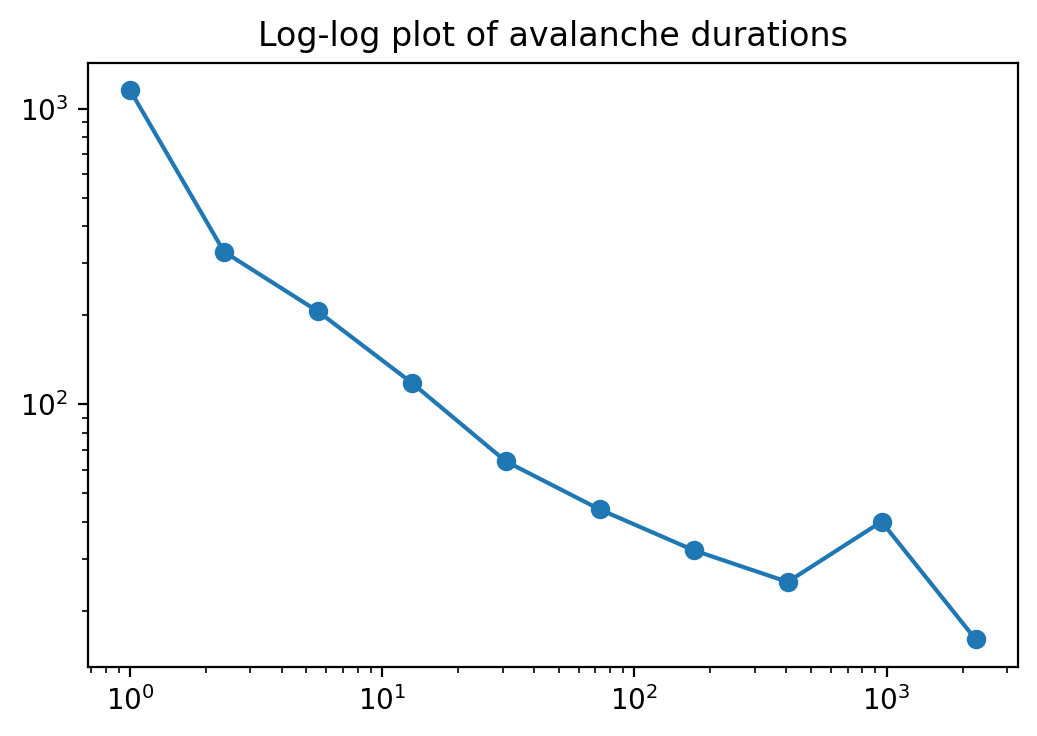

In [39]:
loglogdensity(np.hstack(best.query('topol == "full"').avalanche_sizes.values))

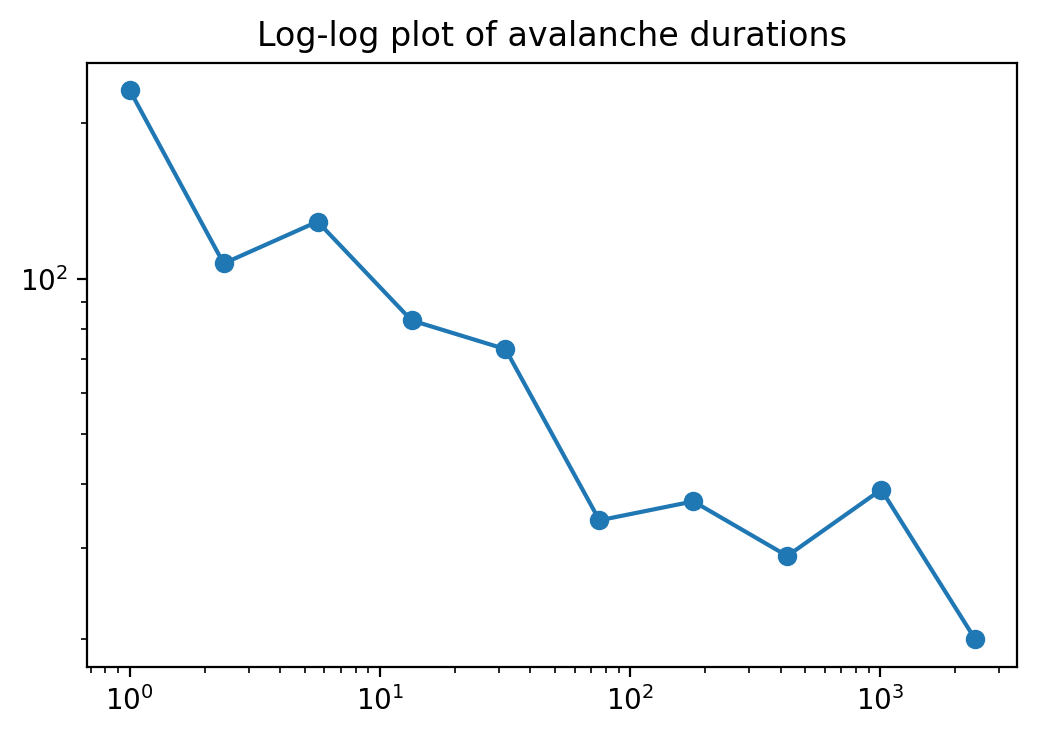

In [40]:
loglogdensity(np.hstack(best.query('topol == "small_world"').avalanche_sizes.values))

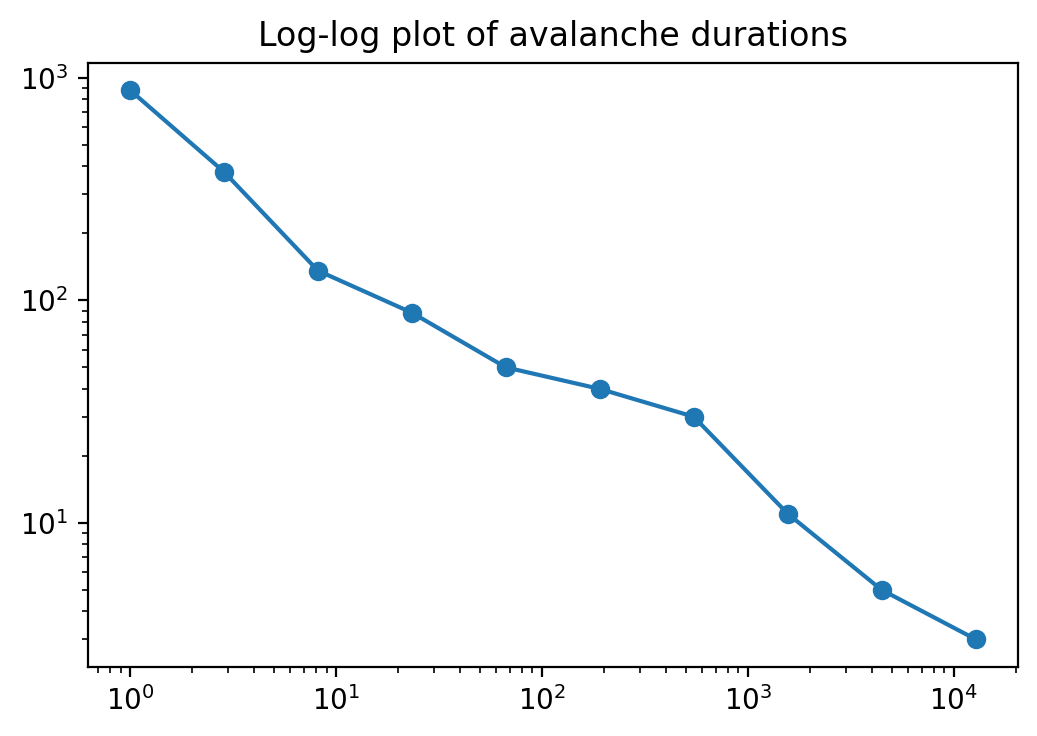

In [41]:
loglogdensity(np.hstack(best.query('topol == "scale_free"').avalanche_sizes.values))